## Fine tune

In [1]:
# Create some labels
train_labels = np.array([0] * 1000 + [1] * 1000)
validation_labels = np.array([0] * 400 + [1] * 400)
print("Training labels are just 1000 0's and 1000 1's", train_labels.shape)
print("Validation labels are just 400 0's and 400 1's", train_labels.shape)

Training labels are just 1000 0's and 1000 1's (2000,)
Validation labels are just 400 0's and 400 1's (2000,)


In [2]:
# Reload the data
path_learned_features_train = './bottleneck_features_train.npy'
path_learned_features_validation = './bottleneck_features_validation.npy'

train_data = np.load(path_learned_features_train)
validation_data = np.load(path_learned_features_validation)
print(train_data.shape)
print(validation_data.shape)

input_size = train_data.shape[1:]
print("Therefore, input size is", input_size)

(2000, 4, 4, 512)
(800, 4, 4, 512)
Therefore, input size is (4, 4, 512)


In [3]:
# Create a model
model = ks.models.Sequential()
model.add(ks.layers.Flatten(input_shape=input_size))
model.add(ks.layers.Dense(256, activation='relu'))
model.add(ks.layers.Dropout(0.5))
model.add(ks.layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(optimizer=ks.optimizers.RMSprop(lr=0.0001, rho=0.9, epsilon=None, decay=0.0),
             loss=ks.losses.binary_crossentropy,
             metrics=['accuracy'])

In [5]:
history = model.fit(train_data, train_labels,
          epochs=50,
          batch_size=256,
          validation_data=(validation_data, validation_labels))
model.save_weights('bottleneck_fc_model.h5')

Train on 2000 samples, validate on 800 samples
Epoch 1/50
2000/2000 [==============================] - 1s 302us/step - loss: 0.7886 - acc: 0.5945 - val_loss: 0.5029 - val_acc: 0.7575
Epoch 2/50
2000/2000 [==============================] - 1s 265us/step - loss: 0.4910 - acc: 0.7640 - val_loss: 0.3855 - val_acc: 0.8663
Epoch 3/50
2000/2000 [==============================] - 1s 261us/step - loss: 0.4076 - acc: 0.8125 - val_loss: 0.4175 - val_acc: 0.7850
Epoch 4/50
2000/2000 [==============================] - 1s 263us/step - loss: 0.3777 - acc: 0.8275 - val_loss: 0.3492 - val_acc: 0.8413
Epoch 5/50
2000/2000 [==============================] - 1s 265us/step - loss: 0.3177 - acc: 0.8680 - val_loss: 0.3238 - val_acc: 0.8688
Epoch 6/50
2000/2000 [==============================] - 1s 264us/step - loss: 0.2918 - acc: 0.8885 - val_loss: 0.2893 - val_acc: 0.8888
Epoch 7/50
2000/2000 [==============================] - 1s 270us/step - loss: 0.2847 - acc: 0.8800 - val_loss: 0.2780 - val_acc: 0.8938
E

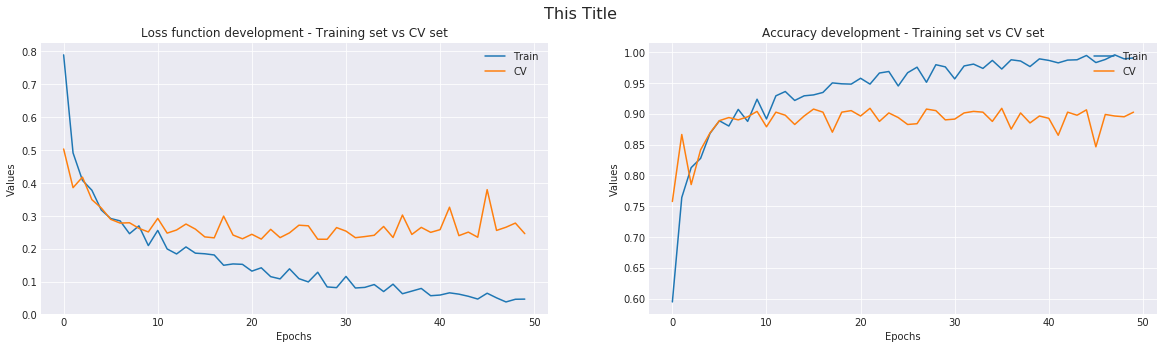

In [6]:
def my_plot_hist(history, model_title = "Default Title"):
    fig = plt.figure(figsize=(5,4))
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5), sharey=False)

    ax1.plot(history.epoch,  history.history['loss'], label="Train")
    ax1.plot(history.epoch,  history.history['val_loss'], label="CV")
    ax1.set_title("Loss function development - Training set vs CV set")
    ax1.legend(loc='upper right')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Values')

    ax2.plot(history.epoch,  history.history['acc'],label="Train")
    ax2.plot(history.epoch,  history.history['val_acc'],label="CV")
    ax2.set_title("Accuracy development - Training set vs CV set")
    ax2.legend(loc='upper right')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Values')

    plt.suptitle(model_title, fontsize=16)

    plt.show()

#history_dict = history.__dict__
my_plot_hist(history, "This Title")

In [ ]:
# OLD CODE
%%script false
path_features_train = './bottleneck_features_train.npy'
path_features_validation = './bottleneck_features_validation.npy'
train_datagen1_pure = ks_preprocessing_image.ImageDataGenerator()
this_train_datagen = train_datagen1_pure

batch_size = 20

train_generator = this_train_datagen.flow_from_directory(
        path_train,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode=None,    # this means our generator will only yield batches of data, no labels
        shuffle=False)      # our data will be in order, so all first 1000 images will be cats, then 1000 dogs
                            # the predict_generator method returns the output of a model, given
                            # a generator that yields batches of numpy data
bottleneck_features_train = my_vgg16_model_not_topped.predict_generator(train_generator,  verbose=1, steps = 1)
# save the output as a Numpy array
with open(path_features_train, 'wb') as fname:
    np.save(fname, bottleneck_features_train)

val_generator = this_train_datagen.flow_from_directory(
        path_validation,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
bottleneck_features_validation = my_vgg16_model_not_topped.predict_generator(val_generator, verbose=1,steps = 1)

with open(path_features_validation, 'wb') as fname:
    np.save(fname, bottleneck_features_train)

#np.save(open(path_features_validation, 'wb'), bottleneck_features_validation)

In [ ]:
# OLD CODE
%%script false
#%%time
train_datagen1_pure = ks_preprocessing_image.ImageDataGenerator()
this_train_datagen = train_datagen1_pure

data_paths = [path_train, path_validation]

returned_features = list()

batch_size = 20

train_generator = this_train_datagen.flow_from_directory(
        path_train,  # this is the target directory
        target_size=(224, 224), 
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

validation_gnerator = this_train_datagen.flow_from_directory(
        path_validation,  # this is the target directory
        target_size=(224, 224), 
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels


model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=5, # 50
        validation_data=validation_generator,
        validation_steps=800 // batch_size)

model.save_weights('./first_try.h5')  # always save your weights after training or during training

In [ ]:
# OLD CODE
%%script false
for this_path in data_paths:
    #print(os.path.split(path))
    print("Working on ", this_path)

    train_generator = this_train_datagen.flow_from_directory(
        this_path,
        target_size = (224,224),
        batch_size = 10,
        #class_mode = "binary",
    )

    bottleneck_features_train = my_vgg16_model_not_topped.predict_generator(
        train_generator, steps = 3, verbose=1)
    print("Finished directory", this_path, "with results shape of:", bottleneck_features_train.shape)
    returned_features.append(bottleneck_features_train)


In [ ]:
# OLD CODE
%%script false
# predict bottleneck features on training data
bottleneck_features_train = my_vgg16_model_not_topped.predict_generator(
    train_generator, steps = 1)
print(bottleneck_features_train.shape)

#train_data = np.load(open('bottleneck_features_train.npy', 'rb'))
#print(train_data.shape)
print()